# House prediction project.
In this project, I build a machine model to predict a property price baesd on certain features such as square feet,Number of bedroom, number of bathroom and location.
The datset was taken from kaggle. 
The project was covers several data science technique like  Data cleaning, one Hot Encoding, GridsearchCv, Features engineering, Outlier removal and Dimensionality reduction.

## Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Reading the file

In [2]:
df1 = pd.read_csv(r"C:\Users\imo\Desktop\bussiness\py class\data science\machine learning\Video\house_price_project\Bengaluru_House_Data.csv")
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Performing data exploration

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df1.shape


(13320, 9)

### The dataset contains 13320 record with 9 attributes

### examining the dataset by area type, we have the following result

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### since most of the attributes are not used or does not have any impact on the price of a property, we need to drop them

In [6]:
df2=df1.drop(['area_type','availability','society','balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()  # Checking for null values

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna() # since the number of records that contain null value is insignificant compare to total number of records,
df3.isnull().sum() #  we have to drop them.

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Exploring and examining the 'size' feature

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk'] =df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\imo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##### After examining the unique values in 'size' column. I notice that the BHK and bedroom are the same.
##### so I have to create a new column called 'bhk' and also write  function to extract only the digit from the size column.

In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


## Exploring and examining the 'total_sqft' feature
#### After examining the column, I noticed some value are not single digit but are range of value, so I had to convert them to a single digit float number by creating a function that takes input strings and convert it into two tokens and then take the average of the two numbers

In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def Is_float(x):
    try:
      float(x)
    except:
        return False
    return True
        

In [17]:
df3[~df3['total_sqft'].apply(Is_float)].head()


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [21]:
def convert_sqft_to_num(x):
    tokens = x.split("_")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [22]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Still on feature engineering
###  Since  price per square feet is important in Real estate, we have the find the price per square feet column.

In [23]:
df5 = df4.copy() # creating a new dataframe from the previous and apply the function.
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Exploring the location column.
### when examing the location, I noticed we have 1304  unique locations which is too many.  So to handle text value, we need to used One Hot Encoding. But since the number of unique value is too many, we need to reduce it in order to cut dimensionality cost. Hence I had to create a function that will group all the data point where the count of location is less than or equal to 10 as  one location called 'other location'. Then final convert the locations into dummy variables.


In [28]:
len(df5.location.unique())

1293

In [29]:
df5.location= df5.location.apply(lambda x:x.strip())

In [30]:
location_stat = df5.groupby('location')['location'].agg('count').sort_values(ascending =False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
len(location_stat[location_stat<=10])

1052

In [32]:
location_less_than_10 = location_stat[location_stat<=10]
location_less_than_10


location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [33]:
len(df5.location.unique())

1293

In [34]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df5.location.unique())

242

In [35]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [36]:
df5[df5.total_sqft/df5.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [37]:
df5.shape


(13246, 7)

## Outlier detection and removal
### I had to examined data to see where  a square foot per bedroom is less than some tresshold say 300. Then i created a function to remove those which are out of the tress hold.

In [38]:
df6 =df5[~(df5.total_sqft/df5.bhk<300)]

In [39]:
df6.shape

(12502, 7)

In [40]:
df6.price_per_sqft.describe()

count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
## this function find the standard deviation of price per sqarebase on the location groupin
## and create arrange in which any value found outside the range is treated as outlier

def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index =True)
    return df_out


In [40]:
df7 = remove_outliers(df6)

In [41]:
df7.shape

(10140, 7)

In [42]:
df7.head(29)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.00,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.00,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.00,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.00,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.00,5,5666.666667


### Stiil we observed that some property with less number of bedroom has a higer price,  hence I created a fuction to remove thes outlier. I created a fuction to visualized such cases using a scatter plot.

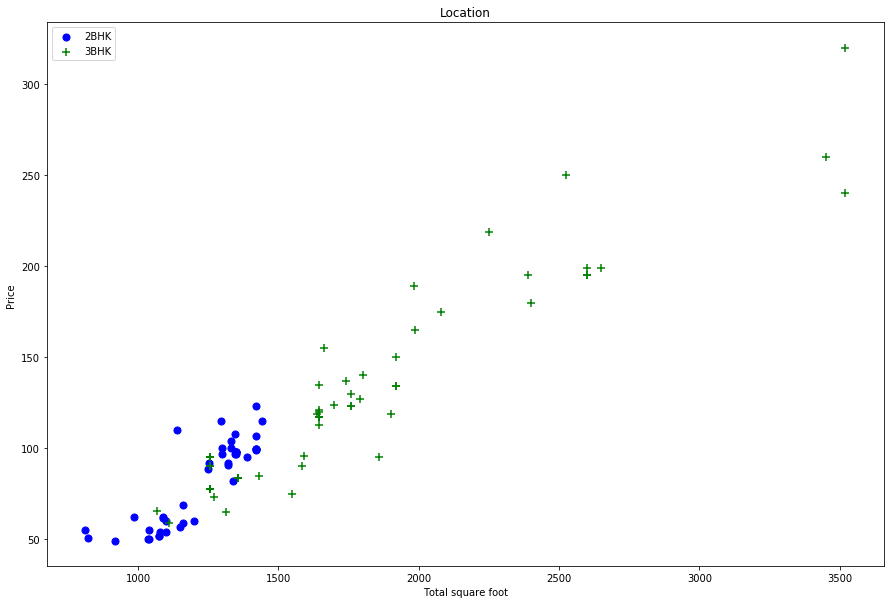

In [43]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter( bhk2.total_sqft,bhk2.price, color='blue',label='2BHK',s=50)
    plt.scatter( bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3BHK',s=50)
    plt.xlabel("Total square foot")
    plt.ylabel("Price ")
    plt.title("Location")
    plt.legend()
plot_scatter_chart(df7,"Hebbal")

In [44]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis ='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7217, 7)

### Visualizing after removing the outliers

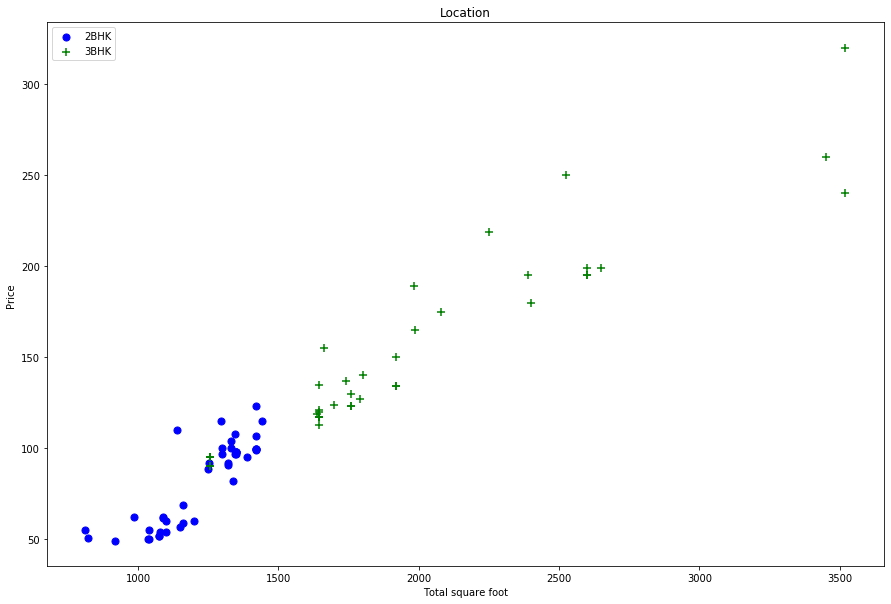

In [45]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'count')

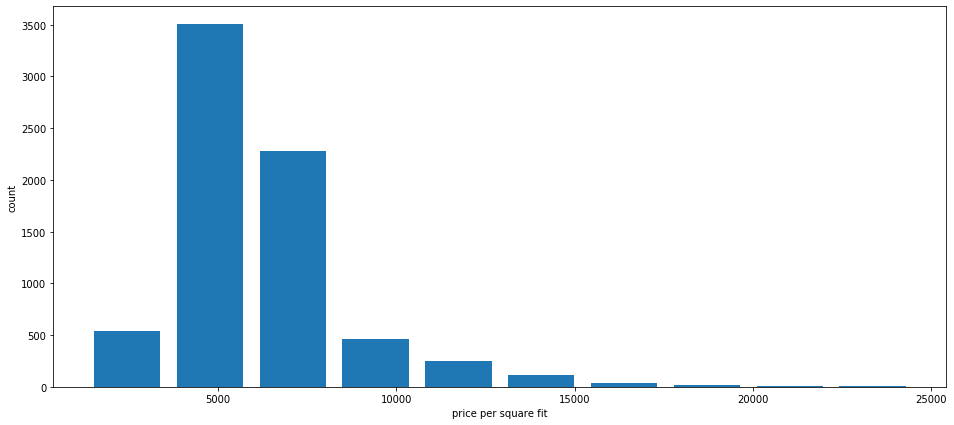

In [51]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(16,7)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('price per square fit')
plt.ylabel('count')

In [47]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5221,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8388,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8477,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9210,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9539,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

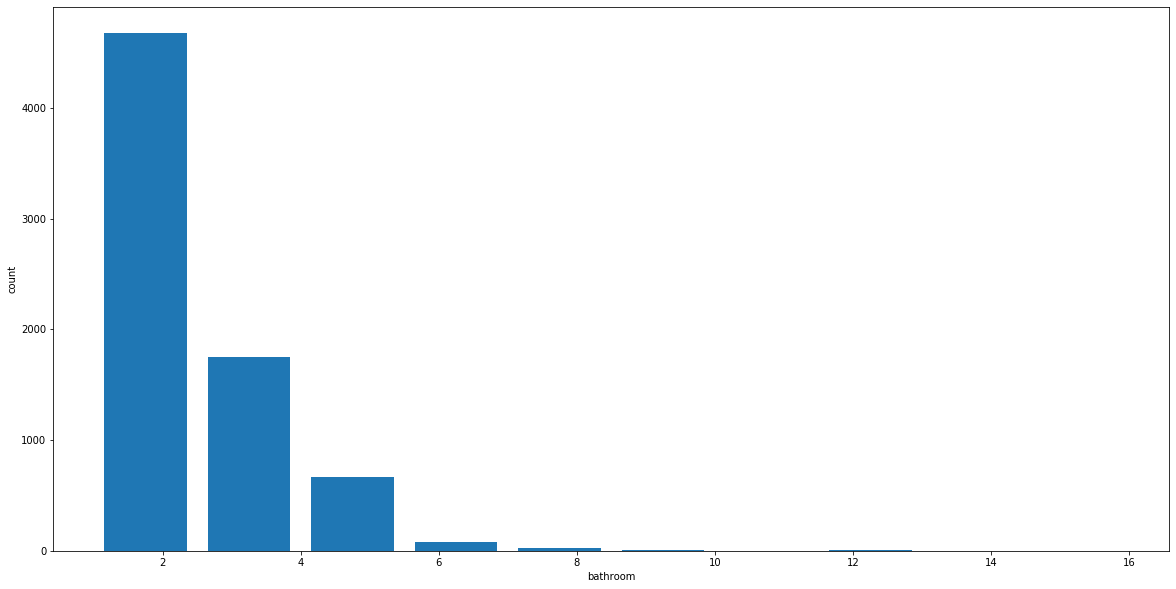

In [51]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('bathroom')
plt.ylabel('count')

In [52]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1611,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5182,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6639,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8313,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
df9 =df8[df8.bath<df8.bhk+2]
df9.shape

(7144, 7)

## Droping some unnecessary feateure

In [54]:
df10 =df9.drop(['size','price_per_sqft'], axis ='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### Converting the location into dummy variable
####  Since the location column contains text, we need to convert into numerical variables using One Hot Encoding.

In [55]:
dumies = pd.get_dummies(df10.location)
dumies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df11 = pd.concat([df10,dumies.drop('other', axis='columns')],axis='columns')
df11.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12 = df11.drop('location', axis = 'columns')

In [58]:
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dividing the data into independent variable (x) and Depending variable (y)

In [59]:
x = df12.drop('price', axis ='columns')
x.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y = df12.price
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

# Spliting the dataset into training and test set
### 80% of the data was used for training and 20% for testing

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size =0.2, random_state = 10)

## Training the model using Linear regression model 
#### After training the model, we test it using the test date and then evaluate the model.

In [62]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_test, y_test)



0.80468587699143

#### After training the model using linear regression, I find out the score of the model to by 80%. I had to try other models to find the best model using a kfold Cross validation and the GridsearchCv. After trying out other models, still the linear model has the highest score.

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
CV =  ShuffleSplit(n_splits =5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=CV)

array([-7.77389967e+15,  7.73589508e-01,  8.68629818e-01,  8.50679312e-01,
        8.67827806e-01])

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'linear regression':{'model': LinearRegression(),
                             'params':{
                                 'normalize':[True, False]
                             }
            
        },
        'lasso':{'model':Lasso(),
                 'params':{
                     'alpha':[1,2],
                     'selection':['random', 'cyclic']
                 }
            
        },
        'decison_tree':{'model': DecisionTreeRegressor(),
                        'params':{
                            'criterion':['mse','friedman_mse'],
                            'splitter':['best','random']
                        }
            
        }
        
        
    }
    scores = []
    CV = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algos_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv =CV,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algos_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])
find_best_model(x,y)


,model,best_score,best_params
0,linear regression,-1.554780e+15,{'normalize': False}
1,lasso,6.728996e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decison_tree,7.260117e-01,"{'criterion': 'mse', 'splitter': 'random'}"


In [65]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [66]:
locazions=x.columns
locazions


Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [70]:
 np.where(x.columns=='Nagasandra')[0][0]

179

#### I created a functiontion to predict the price using the linear regression model.
#### The function takes location, squarefeet, number of bedroomand number of bathroom as arguments.

In [71]:
def predit_price(locations, sqft, bath, bhk):
    global x
    loc_index = np.where(locazions==locations)[0][0]
    
    x = np.zeros(len(locazions))
   
 
    x[0] =sqft
    x[1] =  bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] =1
        
    return lm.predict([x])[0]
    
   

In [72]:
predit_price('1st Phase JP Nagar', 1000, 2, 2)

81.21964375516568

In [73]:
predit_price('1st Phase JP Nagar', 1000, 3, 2)

82.46435991411546

In [74]:
predit_price('Nagasandra', 1000, 3, 2)

40.134120695367734

## Exporting the model to a pickle file
#### After the model has been trained and tested, I exported the model into a pickle file which can be use for production.

In [75]:
import pickle
with open(r'C:\Users\imo\Desktop\home_price_model.pickle', 'wb') as f:
    pickle.dump(lm,f)

## Exporting the location column to a json file

In [76]:
import json
columns = {
    'data_columns': [col.lower()for col in locazions]
}
with open(r"C:\Users\imo\Desktop\columns.json","w") as f:
    f.write(json.dumps(columns))